Paso 1: Cargar y explorar los datos.

Este es el código que te permitirá cargar el archivo CSV en un dataframe de pandas, visualizar la estructura del archivo y detectar si hay valores faltantes.

#### Importar librerías

In [2]:
import pandas as pd

In [3]:
# Cargamos el archivo CSV
file_path = 'ML_cars.csv'
car = pd.read_csv(file_path)

# Visualizamos las primeras filas
print("* Las primeras 5 filas del dataset para explorar su contenido:")
car.head()

* Las primeras 5 filas del dataset para explorar su contenido:


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Ya cargamos los datos correctamente. Tenemos un dataset con varias columnas que representan características de los autos, como el nombre del auto (CarName), el tipo de combustible (fueltype), el tamaño del motor (enginesize), entre otros.

Paso 2: Explorar el dataset

Ahora que cargamos los datos, vamos a hacer una exploración rápida para entender mejor su estructura y la calidad de los datos. Podemos hacer lo siguiente:

- Ver el tamaño del dataset (número de filas y columnas).
- Revisar los tipos de datos de cada columna.
- Verificar si hay valores nulos.

In [4]:
# Ver el tamaño del dataset
print(f"* El dataset tiene {car.shape[0]} filas y {car.shape[1]} columnas.")

* El dataset tiene 205 filas y 26 columnas.


In [5]:
# Ver los tipos de datos de cada columna
print("* Tipos de datos de cada columna:")
print(car.dtypes)

* Tipos de datos de cada columna:
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [6]:
# Verificar si hay valores nulos
print("* Valores nulos en cada columna:")
print(car.isnull().sum())

* Valores nulos en cada columna:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


Los datos parecen estar en buen estado: no hay valores nulos y tenemos una combinación de columnas numéricas y categóricas.

Paso 3: Preprocesamiento de los datos

Ahora que sabemos más sobre el dataset, el siguiente paso es preparar los datos para el análisis o la creación de un modelo de machine learning. Hay varios aspectos que podemos considerar para el preprocesamiento:

- Codificación de variables categóricas: Las columnas como CarName, fueltype, aspiration, etc., son variables categóricas y necesitamos transformarlas a un formato numérico para los modelos. Una técnica común es usar One-Hot Encoding.
- Normalización/escala de los datos: Es posible que algunas columnas numéricas (como price, horsepower) tengan rangos muy diferentes, lo que puede afectar a algunos algoritmos. Podemos estandarizar o normalizar los datos.

¿Por qué esto es importante?
- Codificación: Los algoritmos de machine learning suelen trabajar mejor con datos numéricos.
- Escalado: Muchos modelos, como las regresiones o SVM, son sensibles a la escala de los datos.

In [7]:
# Convertimos las columnas categóricas a variables dummy
car_encoded = pd.get_dummies(car, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], drop_first=True)

# Verificamos el nuevo dataset
print("* Las primeras 5 filas del dataset para explorar su contenido:")
car_encoded.head()

* Las primeras 5 filas del dataset para explorar su contenido:


,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,True,False,False
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,True,False,False
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,False,False,False,False,False,False,False,True,False,False
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,False,False,False,False,False,False,False,True,False,False
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,False,False,False,False,False,False,False,True,False,False


No incluí la columna CarName en la codificación por varias razones importantes:

- Columna no relevante para predicción: El nombre del auto (CarName) no suele aportar información útil para la predicción. Es solo una etiqueta o descripción textual, y no tiene un valor intrínseco que ayude a los algoritmos de machine learning. Los modelos de machine learning suelen centrarse en atributos que tienen relación directa con el desempeño o características del auto, como el tamaño del motor, tipo de combustible, etc.
- Cantidad de categorías: CarName probablemente tiene muchas categorías únicas (cada auto tiene su propio nombre), lo que puede generar un alto número de columnas si la codificamos usando One-Hot Encoding. Esto puede hacer que el modelo sea más complejo y propenso a problemas como el sobreajuste (overfitting).
- Posibles inconsistencias en los nombres: Los nombres de los autos podrían tener variaciones ortográficas o estar compuestos por múltiples palabras que pueden ser difíciles de procesar de forma efectiva sin técnicas más avanzadas como el procesamiento del lenguaje natural (NLP). Sin embargo, este no es nuestro enfoque aquí.

Alternativa para CarName
Podríamos, por ejemplo, extraer solo la marca del auto (como "alfa-romero", "audi") y codificar eso. 

In [8]:
# Convertimos las columnas categóricas a variables dummy
data_encoded = pd.get_dummies(data, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], drop_first=True)

# Verificamos el nuevo dataset
print(data_encoded.head())


NameError: name 'data' is not defined

In [9]:
# Extraer la marca del auto (la primera palabra en CarName) y crear una nueva columna 'CarBrand'
car['CarBrand'] = car['CarName'].apply(lambda x: x.split()[0])

# Ahora podemos hacer One-Hot Encoding de CarBrand
car_encoded = pd.get_dummies(car, columns=['CarBrand', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], drop_first=True)

# Verificamos el dataset
print("* Las primeras 5 filas del dataset para explorar su contenido:")
print(car_encoded.head())


* Las primeras 5 filas del dataset para explorar su contenido:
   car_ID  symboling                   CarName  wheelbase  carlength  \
0       1          3        alfa-romero giulia       88.6      168.8   
1       2          3       alfa-romero stelvio       88.6      168.8   
2       3          1  alfa-romero Quadrifoglio       94.5      171.2   
3       4          2               audi 100 ls       99.8      176.6   
4       5          2                audi 100ls       99.4      176.6   

   carwidth  carheight  curbweight  enginesize  boreratio  ...  \
0      64.1       48.8        2548         130       3.47  ...   
1      64.1       48.8        2548         130       3.47  ...   
2      65.5       52.4        2823         152       2.68  ...   
3      66.2       54.3        2337         109       3.19  ...   
4      66.4       54.3        2824         136       3.19  ...   

   cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
0                 False              

In [10]:
# Resumen del dataset
print("* Resumen del Dataset:")
print("- " * 24)
print(df_cars.info())

* Resumen del Dataset:
- - - - - - - - - - - - - - - - - - - - - - - - 


NameError: name 'df_cars' is not defined

In [11]:
# Estadísticas descriptivas
print("* Estadísticas descriptivas del Dataset:")
print("- " * 40)
print(df_cars.describe())


* Estadísticas descriptivas del Dataset:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


NameError: name 'df_cars' is not defined

Están cargados los datos y verificado que no hay valores faltantes. Eso significa que los datos están completos, lo cual facilita el análisis. Ahora podemos proceder con más análisis exploratorio.

Paso 2: Visualización de distribuciones.

Sería útil visualizar las distribuciones de las variables clave para entender mejor cómo están distribuidos los datos. Podemos empezar por las siguientes:

- Distribución del precio de los automóviles.
- Distribución de la potencia del motor (horsepower).
- Relación entre el precio y el tamaño del motor (enginesize).

NameError: name 'df_cars' is not defined

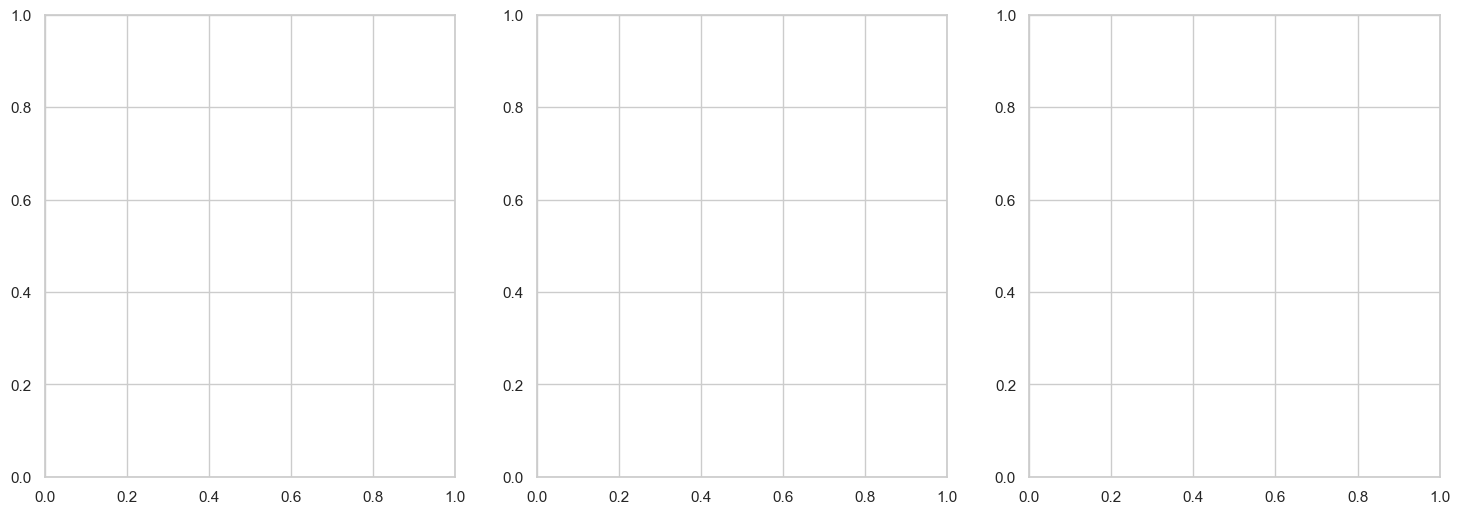

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con 3 subplots (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Distribución del precio
sns.histplot(df_cars['price'], kde=True, ax=axes[0])
axes[0].set_title('Distribución del Precio de los Automóviles')
axes[0].set_xlabel('Precio (USD)')
axes[0].set_ylabel('Frecuencia')

# 2. Distribución de la potencia del motor
sns.histplot(df_cars['horsepower'], kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribución de la Potencia del Motor (Horsepower)')
axes[1].set_xlabel('Potencia (HP)')
axes[1].set_ylabel('Frecuencia')

# 3. Relación entre tamaño del motor y precio
sns.scatterplot(x='enginesize', y='price', data=df_cars, hue='fueltype', ax=axes[2])
axes[2].set_title('Relación entre Tamaño del Motor y Precio')
axes[2].set_xlabel('Tamaño del Motor')
axes[2].set_ylabel('Precio (USD)')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Los gráficos nos ofrecen información interesante:

- Distribución del Precio de los Automóviles: La mayoría de los autos tienen un precio inferior a 20,000 USD, con un pico alrededor de los 8,000 a 10,000 USD. Hay algunos autos más caros, pero son menos frecuentes.

- Distribución de la Potencia del Motor (Horsepower): La potencia de la mayoría de los autos está entre 50 y 150 caballos de fuerza (HP). Hay pocos autos con más de 200 HP.

- Relación entre Tamaño del Motor y Precio: Observamos una clara tendencia positiva: los autos con motores más grandes tienden a tener precios más altos. Además, parece haber una diferencia entre autos a gasolina (gas) y diésel, donde los de gasolina tienen una mayor dispersión de precios.

Paso 3: Limpieza y preparación de datos

- Verificar la consistencia de los nombres de las columnas: Asegurarnos de que no haya espacios, caracteres especiales o mayúsculas innecesarias.

- Codificación de variables categóricas: Transformar variables categóricas en variables numéricas para que puedan ser utilizadas por los modelos de machine learning.

- Normalización (opcional): A veces, es útil normalizar las características numéricas para que todas estén en la misma escala.

In [ ]:
# 1. Limpiar nombres de columnas
df_cars.columns = df_cars.columns.str.strip().str.lower().str.replace(' ', '_')

# 2. Codificar variables categóricas usando pd.get_dummies
df_cars_encoded = pd.get_dummies(df_cars, drop_first=True)

# 3. Normalización de variables numéricas (opcional)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = df_cars_encoded.select_dtypes(include=['float64', 'int64']).columns
df_cars_encoded[num_cols] = scaler.fit_transform(df_cars_encoded[num_cols])

# Ver las primeras filas del dataframe codificado
print(df_cars_encoded.head())
